           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


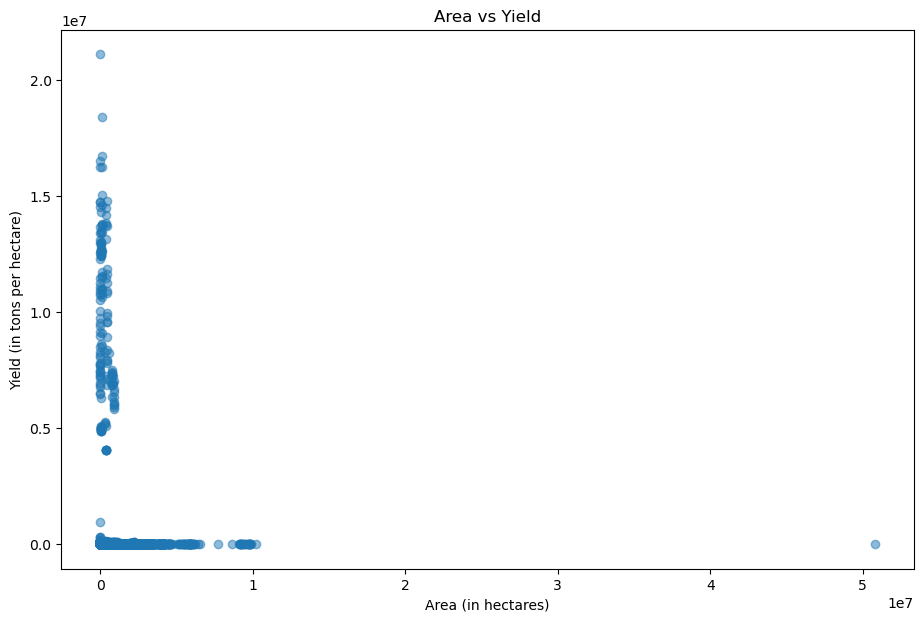

Mean Squared Error: 178716458863.98154
R^2 Score: 0.801028021067093
First 5 Predictions:
[ 12901.31333085  -2403.7430837  -26411.86057813   4861.06830492
  17474.64180481]


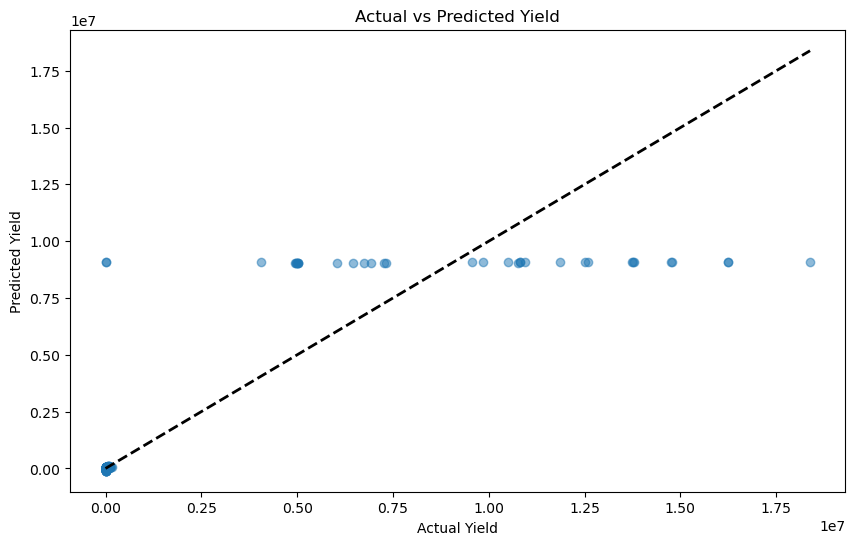

Index(['Crop_Year', 'State', 'Area', 'Production', 'Annual_Rainfall',
       'Fertilizer', 'Pesticide', 'Yield', 'Crop_Arhar/Tur', 'Crop_Bajra',
       'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom',
       'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander',
       'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
       'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut',
       'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute',
       'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor',
       'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
       'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses',
       'Crop_Other Cereals', 'Crop_Other Kharif pulses',
       'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato',
       'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millet

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


#load the dataset
df=pd.read_csv("crop_yield.csv")
print(df.head())

#cleanig the dataset
df.dropna(inplace=True)

#feature engineering
df['Yield']=df['Production']*1000/df['Area']
df = pd.get_dummies(df, columns=['Crop', 'Season'], drop_first=True)

#visualizing the dataset
plt.figure(figsize=(11,7))
plt.scatter(df['Area'], df['Yield'], alpha=0.5)
plt.title('Area vs Yield')  
plt.xlabel('Area (in hectares)')
plt.ylabel('Yield (in tons per hectare)')   
plt.show()

#define features and target variable
X = df.drop(columns=['State','Fertilizer','Production', 'Yield'])  # Features
y = df['Yield']  # Target

#spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#model creation
model=LinearRegression()
model.fit(x_train, y_train)

#prdicting and evaluating
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2_score_value=r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_score_value}")

#saving the model
joblib.dump(model, 'crop_yield_model.pkl')

#loading the model
loaded_model = joblib.load('crop_yield_model.pkl')

#making test predictions
test_predictions = loaded_model.predict(x_test)

#displaying the first 5 predictions
print("First 5 Predictions:")
print(test_predictions[:5]) 

#visualizing predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_predictions, alpha=0.5)            
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')  
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

print(df.columns)  # Displaying the columns of the DataFrame